In [46]:
import keras
from keras.datasets import mnist
import numpy as np
from keras.models import Model
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten
from keras import backend as k
#load mnist dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
img_rows, img_cols = 28, 28

Modified National Institute of Standards and Technology database is a large database of handwritten digits (0 to 9). The database contains 60,000 training images and 10,000 testing images each of size 28x28

Here X_train contains 60,000 training images’ data each of size 28x28 and y_train contains their corresponding labels.

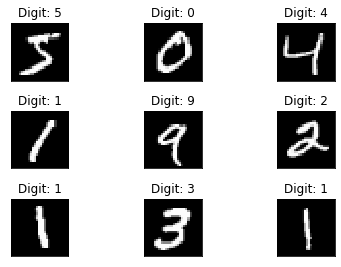

In [47]:
#Visualization
import matplotlib.pyplot as plt
fig = plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(X_train[i], cmap = 'gray', interpolation = 'none')
    plt.title("Digit: {}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([])

As can be seen here, at left top corner the image of ‘5’ is stored is X_train[0] and y_train[0] contains label ‘5’.

In [48]:
"""Reshaping
This assumes our data format for 3D data, "channels_last"
assumes (conv_dim1, conv_dim2, conv_dim3, channels) while
"channels_first" assumes (channels, conv_dim1, conv_dim2, conv_dim3)
"""

if k.image_data_format() == 'channel_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

X_train = X_train.astype('float32') #to_categorical function demands float32 type
X_test = X_test.astype('float32')
X_train /= 255 #Normalize data to reduce calculations of large terms
X_test /= 255
print('X_train shape:', X_train.shape) #X_train shape: (60000, 28, 28, 1)

X_train shape: (60000, 28, 28, 1)


In [49]:
from tensorflow.keras.utils import to_categorical
#set number of categories
num_category = 10
# convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_category)
y_test = to_categorical(y_test, num_category)

In [50]:
#Model building
model = keras.Sequential()
#32 convolution filters used each of size 3x3
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
#64 convolution filters used each of size 3x3
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#randomly turn neurons on and off to improve convergence
model.add(Dropout(0.25))
#flatten since too many dimensions, we only want a classification output
model.add(Flatten())
#fully connected to get all relevant data
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
#output a softmax to squash the matrix into output probabilities
model.add(Dense(num_category, activation='softmax'))

In [51]:
import tensorflow as tf
#Adaptive learning rate (adaDelta) is a popular form of gradient descent rivaled only by adam and adagrad
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='Adadelta', metrics=['accuracy'])

In [52]:
batch_size = 128
num_epoch = 10
#model training
model_log = model.fit(X_train, y_train, batch_size=batch_size, epochs = num_epoch, verbose = 1, validation_data=(X_test, y_test))

Epoch 1/10
469/469 [==============================] - 53s 112ms/step - loss: 2.2990 - accuracy: 0.1198 - val_loss: 2.2474 - val_accuracy: 0.2782
Epoch 2/10
469/469 [==============================] - 51s 110ms/step - loss: 2.2402 - accuracy: 0.2152 - val_loss: 2.1748 - val_accuracy: 0.3811
Epoch 3/10
469/469 [==============================] - 52s 110ms/step - loss: 2.1736 - accuracy: 0.3027 - val_loss: 2.0823 - val_accuracy: 0.5246
Epoch 4/10
469/469 [==============================] - 52s 110ms/step - loss: 2.0841 - accuracy: 0.3906 - val_loss: 1.9574 - val_accuracy: 0.6151
Epoch 5/10
469/469 [==============================] - 51s 110ms/step - loss: 1.9612 - accuracy: 0.4756 - val_loss: 1.7953 - val_accuracy: 0.6704
Epoch 6/10
469/469 [==============================] - 52s 110ms/step - loss: 1.8108 - accuracy: 0.5348 - val_loss: 1.6044 - val_accuracy: 0.7216
Epoch 7/10
469/469 [==============================] - 51s 110ms/step - loss: 1.6455 - accuracy: 0.5844 - val_loss: 1.3992 - val_ac

Now the trained model needs to be evaluated in terms of performance

In [53]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.9099323153495789
Test accuracy: 0.8137000203132629


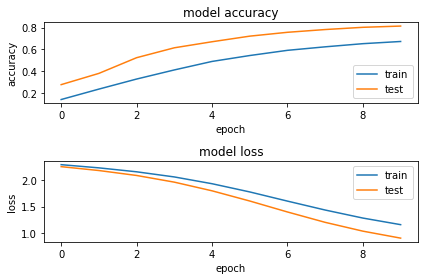

In [56]:
import os
#plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_log.history['accuracy'])
plt.plot(model_log.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

Now, the trained model needs to be serialized. The architecture or structure of the model will be stored in a json file and the weights will be stored in hdf5 file format

In [57]:
#Save the model
#Serialize model to JSON
model_digit_json = model.to_json()
with open("model_digit.json", "w") as json_file:
    json_file.write(model_digit_json)
#Serialize weights to HDF5
model.save_weights("model_digit.h5")
print("Saved model to disk")

Saved model to disk


Hence the saved model can be reused later or easily ported to other environments too